<a href="https://colab.research.google.com/github/fatemeh-ict/machine-learnin/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [37]:
bc=load_breast_cancer()

In [38]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [39]:
bc.target[500]

1

In [40]:
bc.target.shape

(569,)

In [41]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [42]:
bc.data.shape

(569, 30)

#preprocessing

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=.2)


In [44]:
x_train.shape,y_train.shape

((455, 30), (455,))

In [45]:
x_test.shape,y_test.shape

((114, 30), (114,))

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [55]:
#metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
  acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
  acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)
  pre_test=precision_score(y_true=y_test,y_pred=y_pred_test)
  re_test=recall_score(y_true=y_test,y_pred=y_pred_test)
  print(f'acc_train: {acc_train}- acc_test: {acc_test}- presicion: {pre_test}- recall: {re_test}')
  return acc_train,acc_test,pre_test,re_test

Naive Bayes

In [56]:

#model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [95]:
#prediction
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

In [96]:
acc_train_gnb,acc_test_gnb,pre_gnb,re_gnb=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.945054945054945- acc_test: 0.9298245614035088- presicion: 0.927536231884058- recall: 0.9552238805970149


knn

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree', leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [67]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

In [68]:
acc_train_knn,acc_test_knn,pre_knn,re_knn=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.978021978021978- acc_test: 0.9824561403508771- presicion: 0.9710144927536232- recall: 1.0


Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=128,min_samples_split=4,criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [75]:
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)

In [76]:
acc_train_dt,acc_test_dt,pre_dt,re_dt=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.9978021978021978- acc_test: 0.9298245614035088- presicion: 0.9402985074626866- recall: 0.9402985074626866


Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,max_depth=64,min_samples_split=8)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [77]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [78]:
acc_train_rf,acc_test_rf,pre_rf,re_rf=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.9956043956043956- acc_test: 0.956140350877193- presicion: 0.9558823529411765- recall: 0.9701492537313433


SVM

In [80]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [81]:
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)

In [82]:
acc_train_svm,acc_test_svm,pre_svm,re_svm=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.9846153846153847- acc_test: 0.9736842105263158- presicion: 0.9705882352941176- recall: 0.9850746268656716


Logestic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [85]:
acc_train_lr,acc_test_lr,pre_lr,re_lr=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.9714285714285714- acc_test: 0.956140350877193- presicion: 0.9305555555555556- recall: 1.0


ANN

In [86]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=512,activation='relu',solver='adam',batch_size=64)
ann.fit(x_train,y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [87]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)

In [88]:
acc_train_ann,acc_test_ann,pre_ann,re_ann=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.9868131868131869- acc_test: 0.9473684210526315- presicion: 0.9552238805970149- recall: 0.9552238805970149


Comparison

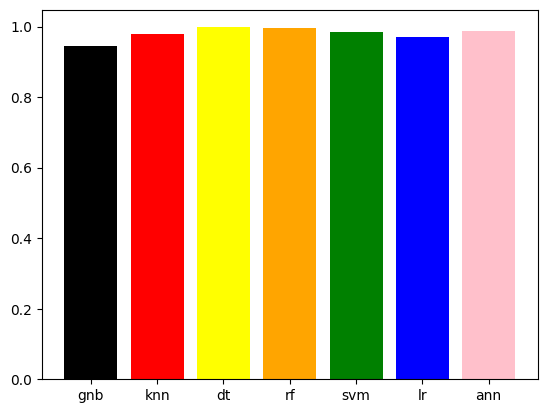

In [91]:
acc_train=[acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
titles=['gnb','knn','dt','rf','svm','lr','ann']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(titles,acc_train,color=colors)
plt.show()



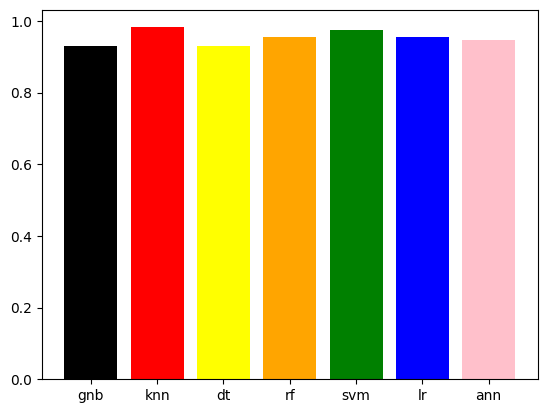

In [92]:
acc_test=[acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
titles=['gnb','knn','dt','rf','svm','lr','ann']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(titles,acc_test,color=colors)
plt.show()


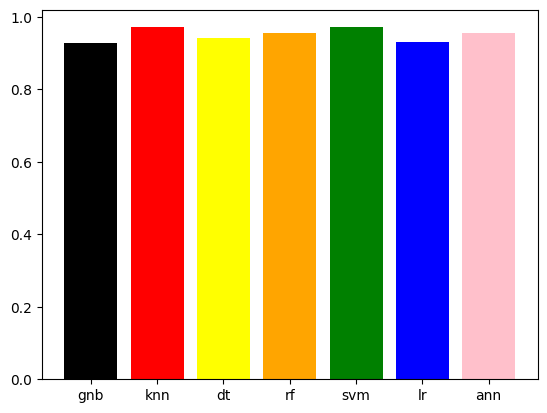

In [93]:
pre_test=[pre_gnb,pre_knn,pre_dt,pre_rf,pre_svm,pre_lr,pre_ann]
titles=['gnb','knn','dt','rf','svm','lr','ann']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(titles,pre_test,color=colors)
plt.show()


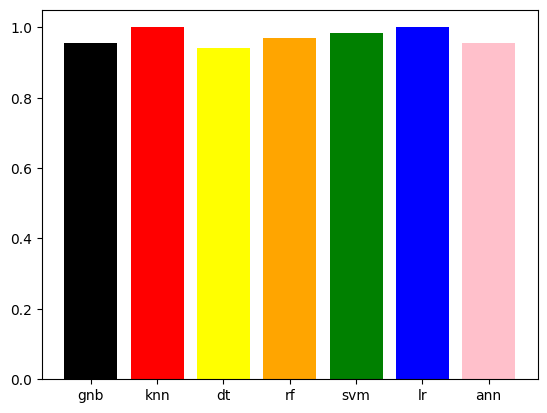

In [97]:
re_test=[re_gnb,re_knn,re_dt,re_rf,re_svm,re_lr,re_ann]
titles=['gnb','knn','dt','rf','svm','lr','ann']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(titles,re_test,color=colors)
plt.show()